# Performance Assessment

In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import scipy.signal as signal
import librosa
from scipy.fftpack import fft, ifft
INT16_FAC = (2**15)-1
INT32_FAC = (2**31)-1
INT64_FAC = (2**63)-1
norm_fact = {'int16':INT16_FAC, 'int32':INT32_FAC, 'int64':INT64_FAC,'float32':1.0,'float64':1.0}


### User Input Onset Detection

Text(0, 0.5, 'Amplitude')

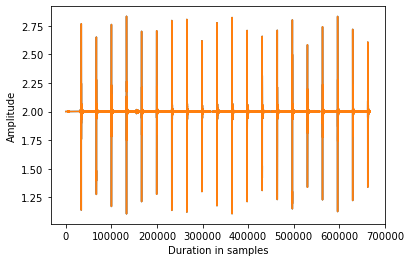

In [3]:
audio = '/Users/noelalben/Desktop/Helloismir.wav'

y,sr = librosa.load(audio, sr = 44100)
y = np.float32(y)/norm_fact[y.dtype.name]
y = y+2
plt.plot(y)
y = np.where(y <= 0.25*np.max(y),0,y)
plt.plot(y)
plt.xlabel("Duration in samples")
plt.ylabel("Amplitude")




[ 34048  67200 100224 133376 155264 166400 199424 232576 265600 298752
 331776 364800 397952 430976 464128 497152 530176 563328 596352 629376
 662528]


Text(0, 0.5, 'Amplitude')

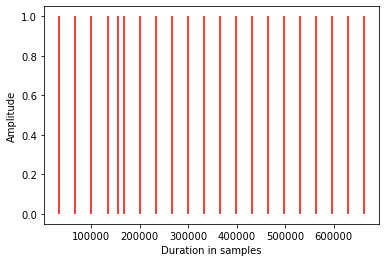

In [4]:
onset_frames = librosa.onset.onset_detect(y, sr=sr, hop_length=128, units='samples')
print(onset_frames)
plt.vlines(onset_frames, 0, 1, color='r',linestyle='solid', label='Onsets')
plt.xlabel("Duration in samples")
plt.ylabel("Amplitude")

### Inter Onset Interval User

In [5]:
inter_onset2 = np.zeros(onset_frames.size-1)

In [6]:
for i  in range(inter_onset2.size-1):     
        inter_onset2[i] =int(onset_frames[i+1])-int(onset_frames[i])

In [7]:
print(inter_onset2)

[33152. 33024. 33152. 21888. 11136. 33024. 33152. 33024. 33152. 33024.
 33024. 33152. 33024. 33152. 33024. 33024. 33152. 33024. 33024.     0.]


### Pattern Generator

[     0  49617  99234 165390 198468 264624 314241 363858 430014 463092
 529248 578865 628482 694638 727716 793872 843489 893106 959262 992340]


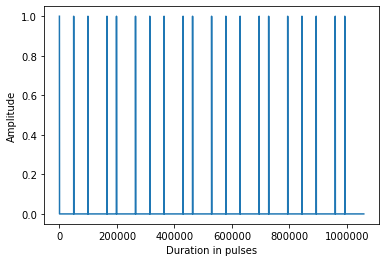

In [26]:
fs = 44100
bpm= 160
timsig = 16
bar = 4
s = np.array([1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0])


while True:
        if (60*fs%bpm != 0):
            fs+=1
        else:
            break

samplehop= int((60/bpm)*fs)
x = np.zeros(int(fs*((60/bpm)*bar*timsig)))
barc=0
countsig=timsig
si=0
for counter in range(len(x)):
        if (counter%samplehop==0):
             imp = signal.unit_impulse((int(fs*((60/bpm)*bar*timsig))), [counter])
             if (s[si]==1):
                if(countsig==timsig):
                    x = x+(imp)
                
                else:
                    x = x+ (imp)
             elif (s[si]==0):
                  x = x
            
                 
            
                
             counter+=1
             countsig-=1
             si+=1
             if(countsig==0):
                countsig = timsig
                barc+=1
                si=0
                if(barc==bar):
                    break
    
onset_gen = np.where(x>0) 
onset_gen = onset_gen[0]


plt.plot(x)
plt.xlabel("Duration in pulses")
plt.ylabel("Amplitude")
audio = '/Users/noelalben/Desktop/Helloismir.wav'

y,sr = librosa.load(audio, sr = 44100)
y = np.float32(y)/norm_fact[y.dtype.name]
y = (0.5*y)+0.8
#plt.plot(y[34048:265600])
print(onset_gen)


### Inter Onset Interval Generated Pattern

Text(0, 0.5, 'Amplitude')

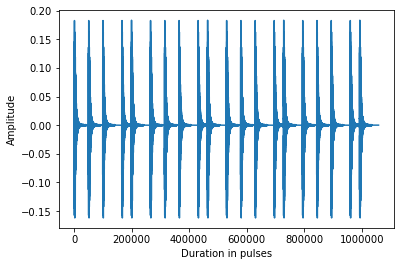

In [27]:
sample_sound = '/Users/noelalben/1e0awebapp/static/Data/SampleSounds/Hi Hat 8.wav'
y, s = librosa.load(sample_sound, sr=fs)
zeros = np.zeros(x.size-y.size)
y = np.append(y,zeros)
Y = fft(y)
X = fft(x)
kick1 = np.real(ifft(X*Y))
plt.plot(kick1)
plt.xlabel("Duration in pulses")
plt.ylabel("Amplitude")

In [28]:
inter_onset1 = np.zeros(onset_gen.size-1)

In [14]:
for i  in range(inter_onset1.size-1):     
        inter_onset1[i] =int(onset_gen[i+1])-int(onset_gen[i])

In [15]:
print(inter_onset1)

[16539. 33078. 49617. 66156. 33078. 66156. 16539. 33078. 49617. 66156.
 33078. 66156. 16539. 33078. 49617. 66156. 33078. 66156. 16539. 33078.
 49617. 66156.     0.]


### Percentage Error

In [32]:

s = np.array([1,0,1,0])
cnt = np.count_nonzero(s)
perc = np.ndarray(shape= (bar-1,cnt))
j = 0
for i in range(bar-1):
    for k in range(cnt):
            perc[i,k] = (inter_onset1[j]-inter_onset2[j])
            perc[i,k] = (perc[i,k]/(inter_onset2[j]))*100
            j+=1
for i in range (bar-1):
    print('[', end = '')
    for k in range(cnt):
        perc[i,k] = float("{0:.2f}".format(perc[i,k]))
        s = str(perc[i,k])
        print(s + ' ', end = '')
    print(']', end = '')
    print('', end = '\n')


[39.49 40.62 ]
[40.05 46.61 ]
[42.96 38.92 ]


In [33]:
average = np.zeros(cnt)
for k in range (cnt):
    for i in range(bar-1):
        average[k] += perc[i,k]
print(average/cnt)

[61.25  63.075]


Text(0, 0.5, 'Deviation degree')

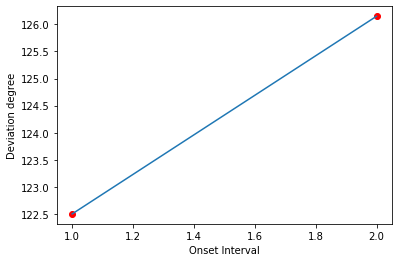

In [34]:
plt.plot(np.arange(1,cnt+1),average,'ro')
plt.plot(np.arange(1,cnt+1),average)
plt.xlabel("Onset Interval")
plt.ylabel("Deviation degree")



In [14]:
average2 = np.zeros(bar)
for k in range (bar-1):
    for i in range(cnt):
        average2[k] += perc[k,i]
print(average2/bar)

[13.1125 10.5925 13.7975  0.    ]


In [15]:
average2 = np.zeros(bar)


In [16]:
average2

array([0., 0., 0., 0.])

In [17]:
perc[i,k]


IndexError: index 2 is out of bounds for axis 1 with size 1

In [18]:
perc

array([[52.45],
       [42.37],
       [55.19]])